In [1]:
#import preliminaries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [2]:
nfl = pd.read_excel('Data/NFL Ratings.xlsx')
barley = pd.read_excel('Data/barley-60.xlsx')
poultry = pd.read_excel('Data/Poultry Price.xlsx')
wing = pd.read_csv('Data/Jumbo Wing Price Monthly Comparison.csv')

In [3]:
nfl.head()
nfl_group = nfl.groupby(["Month", "Year"])
nfl_mean = nfl_group.mean()
nfl_mean.reset_index(inplace=True)
nfl_mean.head()

Month  Year        RTG       +/-  VWRS in millions
0   Aug  2017   1.485652  0.076957          2.377522
1   Aug  2018   1.445652  0.133913          2.382565
2   Dec  2014   9.911538  0.009231         16.561154
3   Dec  2015  10.812500  0.010625         18.656250
4   Dec  2016   9.669444  0.122222         17.577778

In [4]:
wing.head()

Month  Year   Price
0   Jan  2009  1.3557
1   Feb  2009  1.4300
2   Mar  2009  1.4105
3   Apr  2009  1.3214
4   May  2009  1.3200

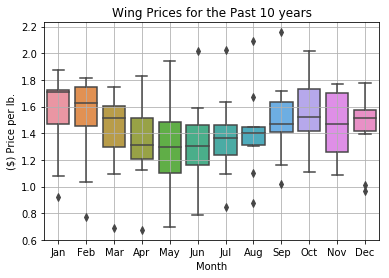

In [5]:
#Create Box and Wisker plot to show wing prices for each month

x = wing["Month"]
y = wing["Price"]

wgraph = sns.boxplot(x, y)
wgraph.set_title("Wing Prices for the Past 10 years")
wgraph.set_ylabel('($) Price per lb.')
wgraph.grid(b=True, which='major')

Month     Price
0   Apr  1.337820
1   Aug  1.407920
2   Dec  1.454030
3   Feb  1.506155
4   Jan  1.562509

AttributeError: Cannot access callable attribute 'get' of 'DataFrameGroupBy' objects, try using the 'apply' method

Month  Year   Price
0     Jan  2009  1.3557
1     Jan  2010  1.6780
2     Jan  2011  0.9181
3     Jan  2012  1.7090
4     Jan  2013  1.8727
5     Jan  2014  1.0800
6     Jan  2015  1.7090
7     Jan  2016  1.7450
8     Jan  2017  1.8333
9     Jan  2018  1.5791
10    Jan  2019  1.7077
11    Feb  2009  1.4300
12    Feb  2010  1.5005
13    Feb  2011  0.7705
14    Feb  2012  1.6281
15    Feb  2013  1.7070
16    Feb  2014  1.0360
17    Feb  2015  1.6275
18    Feb  2016  1.7876
19    Feb  2017  1.8145
20    Feb  2018  1.4740
21    Feb  2019  1.7920
22    Mar  2009  1.4105
23    Mar  2010  1.2509
24    Mar  2011  0.6926
25    Mar  2012  1.5573
26    Mar  2013  1.5465
27    Mar  2014  1.0952
28    Mar  2015  1.5114
29    Mar  2016  1.6473
..    ...   ...     ...
93    Oct  2009  1.4600
94    Oct  2010  1.2181
95    Oct  2011  1.1057
96    Oct  2012  1.7500
97    Oct  2013  1.3996
98    Oct  2014  1.6778
99    Oct  2015  1.5177
100   Oct  2016  1.7600
101   Oct  2017  2.0191
102   Oct  2018  1.5300
103   Nov  2009  1.4732
104   Nov  2010  1.1085
105   Nov  2011  1.1850
106   Nov  2012  1.7345
107   Nov  2013  1.0879
108   Nov  2014  1.5956
109   Nov  2015  1.4700
110   Nov  2016  1.7715
111   Nov  2017  1.7480
112   Nov  2018  1.4725
113   Dec  2009  1.5555
114   Dec  2010  0.9662
115   Dec  2011  1.3971
116   Dec  2012  1.7450
117   Dec  2013  1.0133
118   Dec  2014  1.5324
119   Dec  2015  1.4977
120   Dec  2016  1.7800
121   Dec  2017  1.5820
122   Dec  2018  1.4711

[123 rows x 3 columns]

C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


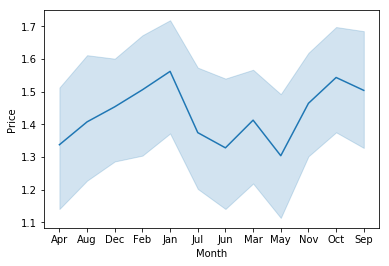

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

Month     Price
0    Apr  1.337820
1    Aug  1.407920
2    Dec  1.454030
3    Feb  1.506155
4    Jan  1.562509
5    Jul  1.374890
6    Jun  1.328300
7    Mar  1.413100
8    May  1.304170
9    Nov  1.464670
10   Oct  1.543800
11   Sep  1.504320

In [28]:
barley.head()

Date Month  Year Comodity   Price  Change
0 2014-02-01   Feb  2014   Barley  169.94       -
1 2014-03-01   Mar  2014   Barley  177.75   0.046
2 2014-04-01   Apr  2014   Barley  181.42  0.0206
3 2014-05-01   May  2014   Barley  181.88  0.0025
4 2014-06-01   Jun  2014   Barley  160.29 -0.1187

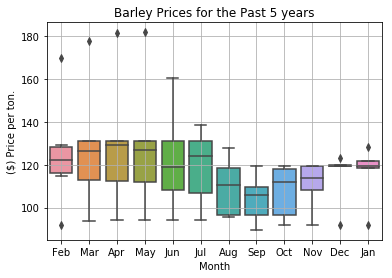

In [29]:
x = barley["Month"]
y = barley["Price"]

bgraph = sns.boxplot(x, y)
bgraph.set_title("Barley Prices for the Past 5 years")
bgraph.set_ylabel('($) Price per ton.')
bgraph.grid(b=True, which='major')

In [41]:
#Combine Month and Year column to get a common time frame
nfl_mean["period"] = nfl_mean["Year"].map(str) + nfl_mean["Month"]
wing["period"] = wing["Year"].map(str) + wing["Month"]
barley["period"] = barley["Year"].map(str) + barley["Month"]

In [31]:
nfl_mean.head()

Month  Year        RTG       +/-  VWRS in millions   period
0   Aug  2017   1.485652  0.076957          2.377522  2017Aug
1   Aug  2018   1.445652  0.133913          2.382565  2018Aug
2   Dec  2014   9.911538  0.009231         16.561154  2014Dec
3   Dec  2015  10.812500  0.010625         18.656250  2015Dec
4   Dec  2016   9.669444  0.122222         17.577778  2016Dec

In [32]:
ratings_wing_price = wing.merge(nfl_mean, left_on='period', right_on='period')
ratings_wing_price.head()

Month_x  Year_x   Price   period Month_y  Year_y        RTG       +/-  \
0     Oct    2014  1.6778  2014Oct     Oct    2014  10.315385  0.258846   
1     Nov    2014  1.5956  2014Nov     Nov    2014  10.668966 -0.009655   
2     Dec    2014  1.5324  2014Dec     Dec    2014   9.911538  0.009231   
3     Jan    2015  1.7090  2015Jan     Jan    2015  20.380000 -0.050000   
4     Feb    2015  1.6275  2015Feb     Feb    2015  47.500000  0.020000   

   VWRS in millions  
0         17.194231  
1         18.468621  
2         16.561154  
3         36.349000  
4        114.440000

In [33]:
ratings_wing_price.sort_values(by=['period'], inplace=True)
ratings_wing_price.head()

Month_x  Year_x   Price   period Month_y  Year_y        RTG       +/-  \
2     Dec    2014  1.5324  2014Dec     Dec    2014   9.911538  0.009231   
1     Nov    2014  1.5956  2014Nov     Nov    2014  10.668966 -0.009655   
0     Oct    2014  1.6778  2014Oct     Oct    2014  10.315385  0.258846   
7     Dec    2015  1.4977  2015Dec     Dec    2015  10.812500  0.010625   
4     Feb    2015  1.6275  2015Feb     Feb    2015  47.500000  0.020000   

   VWRS in millions  
2         16.561154  
1         18.468621  
0         17.194231  
7         18.656250  
4        114.440000

In [34]:
ratings_wing_price

Month_x  Year_x   Price   period Month_y  Year_y        RTG       +/-  \
2      Dec    2014  1.5324  2014Dec     Dec    2014   9.911538  0.009231   
1      Nov    2014  1.5956  2014Nov     Nov    2014  10.668966 -0.009655   
0      Oct    2014  1.6778  2014Oct     Oct    2014  10.315385  0.258846   
7      Dec    2015  1.4977  2015Dec     Dec    2015  10.812500  0.010625   
4      Feb    2015  1.6275  2015Feb     Feb    2015  47.500000  0.020000   
3      Jan    2015  1.7090  2015Jan     Jan    2015  20.380000 -0.050000   
6      Nov    2015  1.4700  2015Nov     Nov    2015   9.966667  0.058333   
5      Oct    2015  1.5177  2015Oct     Oct    2015  11.040000  0.035000   
10     Dec    2016  1.7800  2016Dec     Dec    2016   9.669444  0.122222   
9      Nov    2016  1.7715  2016Nov     Nov    2016  10.136364 -0.020455   
8      Oct    2016  1.7600  2016Oct     Oct    2016   8.964706 -0.090588   
13     Aug    2017  2.0883  2017Aug     Aug    2017   1.485652  0.076957   
16     Dec    2017  1.5820  2017Dec     Dec    2017   8.533333 -0.054333   
12     Feb    2017  1.8145  2017Feb     Feb    2017  45.300000 -0.030000   
11     Jan    2017  1.8333  2017Jan     Jan    2017  18.154545 -0.070909   
15     Nov    2017  1.7480  2017Nov     Nov    2017   9.057895 -0.120526   
14     Oct    2017  2.0191  2017Oct     Oct    2017   8.344828 -0.040000   
19     Aug    2018  1.3800  2018Aug     Aug    2018   1.445652  0.133913   
23     Dec    2018  1.4711  2018Dec     Dec    2018   9.965385  0.086923   
18     Feb    2018  1.4740  2018Feb     Feb    2018  43.100000 -0.050000   
17     Jan    2018  1.5791  2018Jan     Jan    2018  16.122727 -0.081818   
22     Nov    2018  1.4725  2018Nov     Nov    2018   9.566667  0.102500   
21     Oct    2018  1.5300  2018Oct     Oct    2018   8.668750  0.031875   
20     Sep    2018  1.4626  2018Sep     Sep    2018   8.788000 -0.008000   
25     Feb    2019  1.7920  2019Feb     Feb    2019  41.100000 -0.050000   
24     Jan    2019  1.7077  2019Jan     Jan    2019  20.766667  0.100000   

    VWRS in millions  
2          16.561154  
1          18.468621  
0          17.194231  
7          18.656250  
4         114.440000  
3          36.349000  
6          17.144444  
5          18.383333  
10         17.577778  
9          18.231818  
8          15.294118  
13          2.377522  
16         14.887400  
12        111.300000  
11         33.363636  
15         16.202895  
14         14.134655  
19          2.382565  
23         17.343462  
18        103.390000  
17         28.842455  
22         16.754167  
21         14.575000  
20         15.061600  
25         98.190000  
24         37.983333

In [35]:
#Calculate Rolling Average for viewers
rVRWS = ratings_wing_price["+/-"].rolling(window=2).mean()


C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


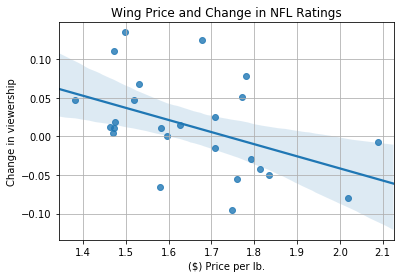

In [51]:
#Graph corelation in viewers and wing price
x = ratings_wing_price["Price"]
y = rVRWS

vwing = sns.regplot(x, y, data=ratings_wing_price)
vwing.set_title("Wing Price and Change in NFL Ratings")
vwing.set_ylabel('Change in viewership')
vwing.set_xlabel('($) Price per lb.')
vwing.grid(b=True, which='major')


In [42]:
barley_wing_price = wing.merge(barley, left_on='period', right_on='period')
barley_wing_price.head()

Month_x  Year_x  Price_x   period       Date Month_y  Year_y Comodity  \
0     Feb    2014   1.0360  2014Feb 2014-02-01     Feb    2014   Barley   
1     Mar    2014   1.0952  2014Mar 2014-03-01     Mar    2014   Barley   
2     Apr    2014   1.1238  2014Apr 2014-04-01     Apr    2014   Barley   
3     May    2014   1.0790  2014May 2014-05-01     May    2014   Barley   
4     Jun    2014   1.1267  2014Jun 2014-06-01     Jun    2014   Barley   

   Price_y  Change   Period  
0   169.94       -  2014Feb  
1   177.75   0.046  2014Mar  
2   181.42  0.0206  2014Apr  
3   181.88  0.0025  2014May  
4   160.29 -0.1187  2014Jun

In [49]:
barley_wing_price

Month_x  Year_x  Price_x   period       Date Month_y  Year_y Comodity  \
0      Feb    2014   1.0360  2014Feb 2014-02-01     Feb    2014   Barley   
1      Mar    2014   1.0952  2014Mar 2014-03-01     Mar    2014   Barley   
2      Apr    2014   1.1238  2014Apr 2014-04-01     Apr    2014   Barley   
3      May    2014   1.0790  2014May 2014-05-01     May    2014   Barley   
4      Jun    2014   1.1267  2014Jun 2014-06-01     Jun    2014   Barley   
5      Jul    2014   1.2109  2014Jul 2014-07-01     Jul    2014   Barley   
6      Aug    2014   1.3067  2014Aug 2014-08-01     Aug    2014   Barley   
7      Sep    2014   1.5071  2014Sep 2014-09-01     Sep    2014   Barley   
8      Oct    2014   1.6778  2014Oct 2014-10-01     Oct    2014   Barley   
9      Nov    2014   1.5956  2014Nov 2014-11-01     Nov    2014   Barley   
10     Dec    2014   1.5324  2014Dec 2014-12-01     Dec    2014   Barley   
11     Jan    2015   1.7090  2015Jan 2015-01-01     Jan    2015   Barley   
12     Feb    2015   1.6275  2015Feb 2015-02-01     Feb    2015   Barley   
13     Mar    2015   1.5114  2015Mar 2015-03-01     Mar    2015   Barley   
14     Apr    2015   1.4367  2015Apr 2015-04-01     Apr    2015   Barley   
15     May    2015   1.4590  2015May 2015-05-01     May    2015   Barley   
16     Jun    2015   1.4836  2015Jun 2015-06-01     Jun    2015   Barley   
17     Jul    2015   1.4836  2015Jul 2015-07-01     Jul    2015   Barley   
18     Aug    2015   1.4500  2015Aug 2015-08-01     Aug    2015   Barley   
19     Sep    2015   1.4824  2015Sep 2015-09-01     Sep    2015   Barley   
20     Oct    2015   1.5177  2015Oct 2015-10-01     Oct    2015   Barley   
21     Nov    2015   1.4700  2015Nov 2015-11-01     Nov    2015   Barley   
22     Dec    2015   1.4977  2015Dec 2015-12-01     Dec    2015   Barley   
23     Jan    2016   1.7450  2016Jan 2016-01-01     Jan    2016   Barley   
24     Feb    2016   1.7876  2016Feb 2016-02-01     Feb    2016   Barley   
25     Mar    2016   1.6473  2016Mar 2016-03-01     Mar    2016   Barley   
26     Apr    2016   1.6881  2016Apr 2016-04-01     Apr    2016   Barley   
27     May    2016   1.4938  2016May 2016-05-01     May    2016   Barley   
28     Jun    2016   1.3859  2016Jun 2016-06-01     Jun    2016   Barley   
29     Jul    2016   1.3900  2016Jul 2016-07-01     Jul    2016   Barley   
..     ...     ...      ...      ...        ...     ...     ...      ...   
31     Sep    2016   1.6814  2016Sep 2016-09-01     Sep    2016   Barley   
32     Oct    2016   1.7600  2016Oct 2016-10-01     Oct    2016   Barley   
33     Nov    2016   1.7715  2016Nov 2016-11-01     Nov    2016   Barley   
34     Dec    2016   1.7800  2016Dec 2016-12-01     Dec    2016   Barley   
35     Jan    2017   1.8333  2017Jan 2017-01-01     Jan    2017   Barley   
36     Feb    2017   1.8145  2017Feb 2017-02-01     Feb    2017   Barley   
37     Mar    2017   1.7478  2017Mar 2017-03-01     Mar    2017   Barley   
38     Apr    2017   1.8263  2017Apr 2017-04-01     Apr    2017   Barley   
39     May    2017   1.9455  2017May 2017-05-01     May    2017   Barley   
40     Jun    2017   2.0200  2017Jun 2017-06-01     Jun    2017   Barley   
41     Jul    2017   2.0250  2017Jul 2017-07-01     Jul    2017   Barley   
42     Aug    2017   2.0883  2017Aug 2017-08-01     Aug    2017   Barley   
43     Sep    2017   2.1575  2017Sep 2017-09-01     Sep    2017   Barley   
44     Oct    2017   2.0191  2017Oct 2017-10-01     Oct    2017   Barley   
45     Nov    2017   1.7480  2017Nov 2017-11-01     Nov    2017   Barley   
46     Dec    2017   1.5820  2017Dec 2017-12-01     Dec    2017   Barley   
47     Jan    2018   1.5791  2018Jan 2018-01-01     Jan    2018   Barley   
48     Feb    2018   1.4740  2018Feb 2018-02-01     Feb    2018   Barley   
49     Mar    2018   1.3471  2018Mar 2018-03-01     Mar    2018   Barley   
50     Apr    2018   1.2943  2018Apr 2018-04-01     Apr    2018   Barley   
51     May    2018   1.2718  2018May 2018-05-01    

In [46]:
#Calculate Rolling Average
rbarley = barley_wing_price["Price_y"].rolling(window=2).mean()

C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


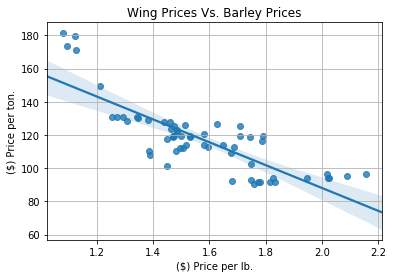

In [52]:
#Graph Corelation between Barley Price and Jumbo Wing Price
x = barley_wing_price["Price_x"]
y = rbarley

bwing = sns.regplot(x, y, data=barley_wing_price)
bwing.set_title("Wing Prices Vs. Barley Prices")
bwing.set_ylabel('($) Price per ton.')
bwing.set_xlabel('($) Price per lb.')
bwing.grid(b=True, which='major')